Eyad Medhat 221100279
/ Hady Aly 221101190
/ Mohamed Mahfouz 221101743
/ Omar Mady 221100745

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
from utils import load_data

In [3]:
# --- STEP 1: FIND RAW DATA ---
raw_filename = 'ratings.csv'
clean_filename = 'ratings_cleaned.csv'

# Search in Root/data/ml-20m/ OR Parent/data/ml-20m/
possible_paths = [
    os.path.join('data', 'ml-20m', raw_filename),      
    os.path.join('..', 'data', 'ml-20m', raw_filename) 
]

input_path = None

print(f"Current Working Directory: {os.getcwd()}")

for path in possible_paths:
    if os.path.exists(path):
        input_path = path
        print(f"Found raw data at: {input_path}")
        break

if input_path:
    try:
        # 1. Load Data
        print("Loading raw data...")
        df = pd.read_csv(input_path)
        
        if 'timestamp' in df.columns:
            df.drop(columns=['timestamp'], inplace=True)

        # 2. Clean Ratings (1-5 Scale)
        print("Standardizing ratings...")
        df['rating'] = df['rating'].clip(lower=1, upper=5).round().astype(int)

        # 3. Save to SAME FOLDER as Input
        # Get the directory of the input file
        dataset_dir = os.path.dirname(input_path)
        output_path = os.path.join(dataset_dir, clean_filename)

        print(f"Saving cleaned file to: {output_path}")
        df.to_csv(output_path, index=False)

        print("-" * 50)
        print(" SUCCESS: Data cleaned and saved in dataset folder.")
        print("-" * 50)
        print(df.head())

    except Exception as e:
        print(f" Error: {e}")

else:
    print("\n ERROR: Could not find 'ratings.csv'. Check your 'dataset/ml-32m' folder.")

Current Working Directory: e:\grad_year_sem1\irs_project\SECTION1_DimensionalityReduction\code
Found raw data at: ..\data\ml-20m\ratings.csv
Loading raw data...
Standardizing ratings...
Saving cleaned file to: ..\data\ml-20m\ratings_cleaned.csv
--------------------------------------------------
 SUCCESS: Data cleaned and saved in dataset folder.
--------------------------------------------------
   userId  movieId  rating
0       1        2       4
1       1       29       4
2       1       32       4
3       1       47       4
4       1       50       4


In [4]:
# --- STEP 1: SETUP PATHS AUTOMATICALLY ---
# We look for 'ratings_cleaned.csv' in the dataset folder
clean_filename = 'ratings_cleaned.csv'

possible_paths = [
    os.path.join('data', clean_filename),     
    os.path.join('..', 'data', clean_filename)
]

# --- STEP 2: FIND AND LOAD CLEAN DATA ---
data_path = None

print(f"Current Working Directory: {os.getcwd()}")

for path in possible_paths:
    if os.path.exists(path):
        data_path = path
        print(f" Found cleaned dataset at: {data_path}")
        break

if data_path:
    try:
        # Load the Cleaned CSV
        df = pd.read_csv(data_path)
        print(f" SUCCESS: Data loaded! ({len(df)} rows)")
        print("Verifying ratings range:", sorted(df['rating'].unique()))
            
    except Exception as e:
        print(f" Error loading CSV: {e}")
else:
    print(f"\n ERROR: Could not find '{clean_filename}'.")
    print("Please run the 'Data Cleaning' cell first to generate this file in your dataset folder.")

Current Working Directory: e:\grad_year_sem1\irs_project\SECTION1_DimensionalityReduction\code

 ERROR: Could not find 'ratings_cleaned.csv'.
Please run the 'Data Cleaning' cell first to generate this file in your dataset folder.


In [5]:
current_users = df['userId'].nunique()
current_items = df['movieId'].nunique()
current_interactions = len(df)

print(f"Current Users: {current_users}")
print(f"Current Items: {current_items}")
print(f"Current Interactions (Ratings): {current_interactions}")

Current Users: 138493
Current Items: 26744
Current Interactions (Ratings): 20000263


Statistical Calculations

In [6]:
from utils import Mean, save_csv 

user_stats_df = Mean(df, group_col='userId', target_col='rating')


print("Number of ratings per user (rating_count_per_user) calculated.")
print(user_stats_df.head())

save_csv(user_stats_df,'stats_per_user')

Starting manual loop for Group: 'userId' -> Target: 'rating'...
Number of ratings per user (rating_count_per_user) calculated.
   userId  mean_rating_per_user  rating_count_per_user
0       1              3.942857                    175
1       2              4.000000                     61
2       3              4.122995                    187
3       4              3.571429                     28
4       5              4.272727                     66
    Saved CSV: tables/stats_per_user.csv


In [7]:
item_stats_df = Mean(df, group_col='movieId', target_col='rating')


print("Number of ratings per item (stats_per_item) calculated.")
print(item_stats_df.head())

save_csv(item_stats_df,'stats_per_item')

Starting manual loop for Group: 'movieId' -> Target: 'rating'...
Number of ratings per item (stats_per_item) calculated.
   movieId  mean_rating_per_movie  rating_count_per_movie
0        2               3.232702                   22243
1       29               3.928286                    8520
2       32               3.880747                   44980
3       47               4.017758                   43249
4       50               4.286134                   47006
    Saved CSV: tables/stats_per_item.csv


Item ploting 

    Saved Plot: plots/item_rating_distribution_ascending.png


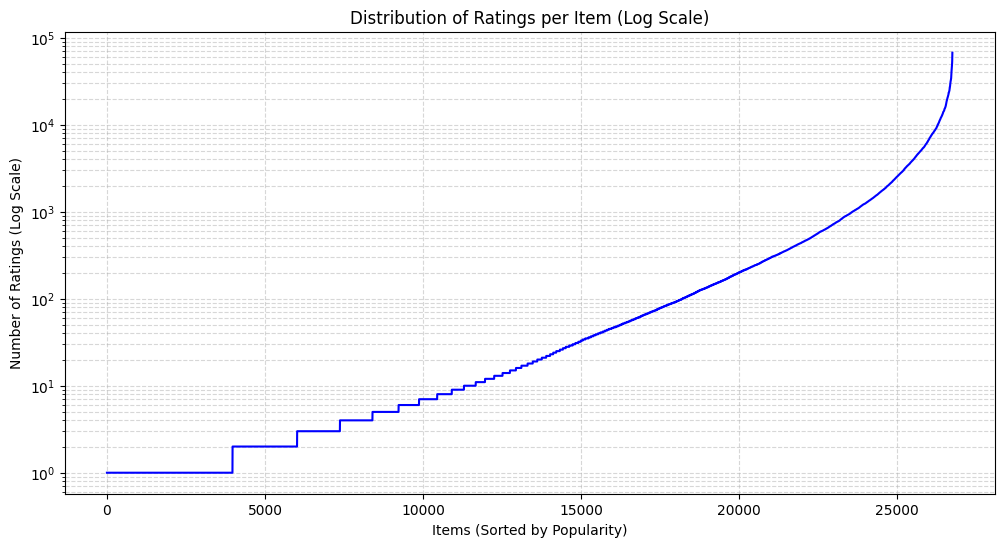

In [8]:
from utils import save_plot

# Ascendingly order the total number of ratings per item
sorted_counts = item_stats_df['rating_count_per_movie'].sort_values(ascending=True).values

# Plot the distribution per item
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(sorted_counts, color='blue', linewidth=1.5)

# Logarithmic scale to visualize the long-tail distribution
ax.set_yscale('log')

ax.set_title('Distribution of Ratings per Item (Log Scale)')
ax.set_xlabel('Items (Sorted by Popularity)')
ax.set_ylabel('Number of Ratings (Log Scale)')
ax.grid(True, which="both", linestyle='--', alpha=0.5)

save_plot(fig, 'item_rating_distribution_ascending')
plt.show()


    Saved Plot: plots/item_rating_distribution_ascending_hist.png


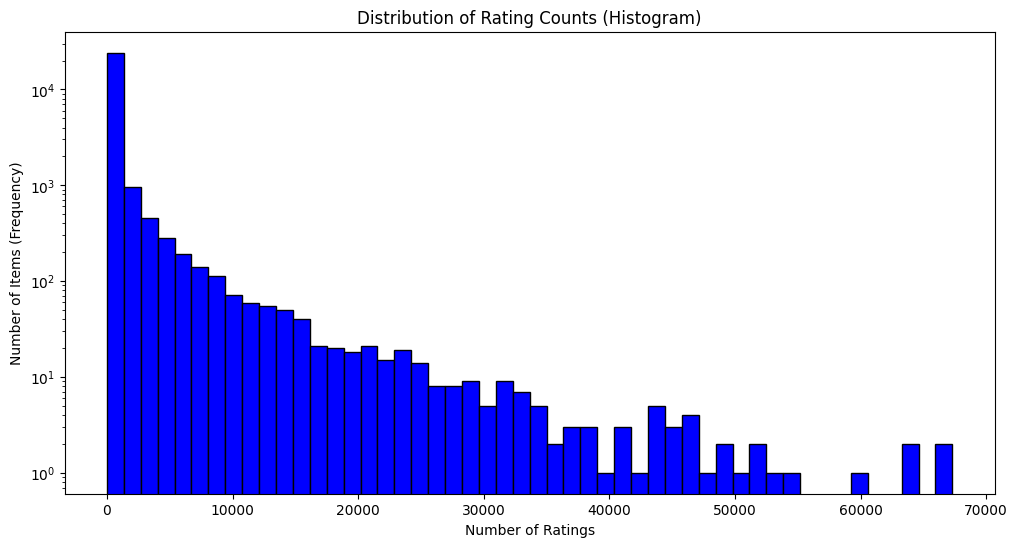

In [9]:
# 1. Sort the DataFrame by the correct column name
sorted_counts = item_stats_df.sort_values(by='rating_count_per_movie', ascending=True)

# Histogram: Frequency of Rating Counts
fig = plt.figure(figsize=(12, 6))

# 2. Plot using the SORTED DataFrame and CORRECT column name
plt.hist(sorted_counts['rating_count_per_movie'], bins=50, edgecolor='black', color='blue', log=True)

plt.title('Distribution of Rating Counts (Histogram)')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Items (Frequency)')

save_plot(fig, 'item_rating_distribution_ascending_hist')
plt.show()

Item Grouping

In [10]:
# 1. Sort items by Average Rating (Manual-friendly approach)
# We already have item_stats_df from Section 1.6
item_stats_sorted = item_stats_df.sort_values(by='mean_rating_per_movie', ascending=True).reset_index(drop=True)

total_items = len(item_stats_sorted)

# 2. Define the index boundaries based on percentages
# Req: <1%, 1-5%, 5-10%, 10-20%, 20-30%, 30-40%, 40-50%, 50-60%, 60-70%, 70-100%
cuts = [0, 0.01, 0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 1.0]
group_labels = ['G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10']

# 3. Manually assign groups based on row position (index)
item_groups = []

# Loop through the sorted dataframe
for index, row in item_stats_sorted.iterrows():
    # Calculate relative position (0.0 to 1.0)
    position = (index + 1) / total_items
    
    # Determine group
    assigned_group = ""
    for i in range(len(cuts) - 1):
        if position <= cuts[i+1]:
            assigned_group = group_labels[i]
            break
            
    item_groups.append(assigned_group)

item_stats_sorted['group'] = item_groups

print("Point 1.8 Complete: Items grouped by percentile position manually.")
print(item_stats_sorted[['movieId', 'mean_rating_per_movie', 'group']].head())
print(item_stats_sorted[['movieId', 'mean_rating_per_movie', 'group']].tail())

save_csv(item_stats_sorted, 'grouped_items.csv')


Point 1.8 Complete: Items grouped by percentile position manually.
   movieId  mean_rating_per_movie group
0   126128                    1.0    G1
1   121436                    1.0    G1
2   127068                    1.0    G1
3   129873                    1.0    G1
4   129875                    1.0    G1
       movieId  mean_rating_per_movie group
26739   121029                    5.0   G10
26740    94737                    5.0   G10
26741   126397                    5.0   G10
26742    94431                    5.0   G10
26743   116227                    5.0   G10
    Saved CSV: tables/grouped_items.csv


In [11]:
# Initialize dictionary
group_sums = {label: 0 for label in group_labels}

# Manual Loop to sum ratings per group
for index, row in item_stats_sorted.iterrows():
    g = row['group']
    n_ratings = row['rating_count_per_movie']
    group_sums[g] += n_ratings

# Convert to DataFrame for easier printing/plotting
group_counts_df = pd.DataFrame(list(group_sums.items()), columns=['group', 'total_ratings'])

# Order ascendingly as required
group_counts_sorted = group_counts_df.sort_values(by='total_ratings', ascending=True)

print("Total ratings per group")
print(group_counts_sorted)


save_csv(group_counts_sorted,'movie_count_per_group.csv')

Total ratings per group
  group  total_ratings
0    G1            313
1    G2          84437
2    G3         105406
5    G6         436168
3    G4         780773
4    G5        1671056
6    G7        1971395
7    G8        2030236
8    G9        2114841
9   G10       10805638
    Saved CSV: tables/movie_count_per_group.csv


    Saved Plot: plots/group_counts_hist_not_sorted.png


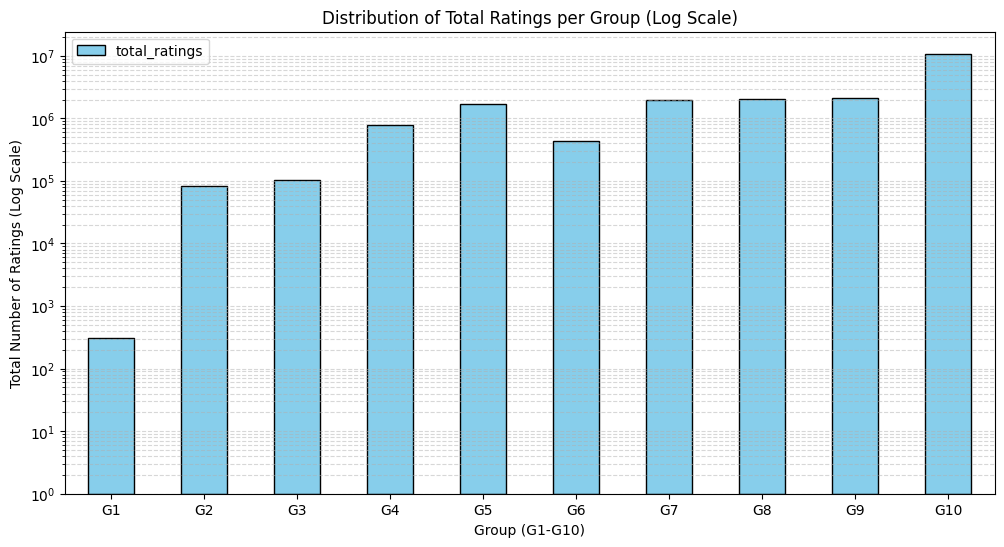

    Saved Plot: plots/group_counts_hist_sorted.png


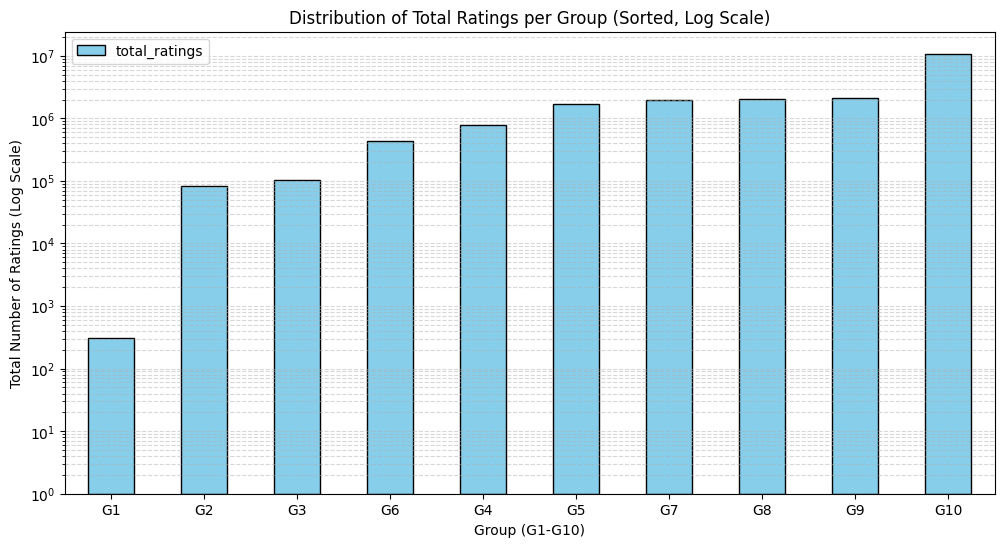

In [12]:
# --- Plot 1: Unsorted Groups ---
fig = plt.figure(figsize=(12, 6))
group_counts_df.plot(kind='bar', color='skyblue', edgecolor='black', log=True, ax=plt.gca())

plt.title('Distribution of Total Ratings per Group (Log Scale)')
plt.xlabel('Group (G1-G10)')
plt.ylabel('Total Number of Ratings (Log Scale)')

# Force x-axis labels to match the group names
# rot=0 makes them horizontal for readability
plt.xticks(range(len(group_counts_df)), group_counts_df['group'], rotation=0) 

plt.grid(axis='y', linestyle='--', alpha=0.5, which='both')
save_plot(fig, 'group_counts_hist_not_sorted')
plt.show()


# --- Plot 2: Sorted Groups ---
fig = plt.figure(figsize=(12, 6))
group_counts_sorted.plot(kind='bar', color='skyblue', edgecolor='black', log=True, ax=plt.gca())

plt.title('Distribution of Total Ratings per Group (Sorted, Log Scale)')
plt.xlabel('Group (G1-G10)')
plt.ylabel('Total Number of Ratings (Log Scale)')

# Force x-axis labels to match the group names of the SORTED data
plt.xticks(range(len(group_counts_sorted)), group_counts_sorted['group'], rotation=0)

plt.grid(axis='y', linestyle='--', alpha=0.5, which='both')
save_plot(fig, 'group_counts_hist_sorted')
plt.show()

In [13]:
from utils import *

# 1. Recalculate Total Items and Percentages
total_items_count = len(item_stats_df)
user_stats_df['pct_rated'] = (user_stats_df['rating_count_per_user'] / total_items_count) * 100

print(f"Total Items: {total_items_count}")
print("------------------------------------------------")

# --- LIST TO STORE SELECTED DATA FOR SAVING ---
selected_data = []


# --- SELECTION ---
# U1: < 2%
u1_id = get_random_user_and_check(
    df=user_stats_df,
    storage_list=selected_data,
    condition_mask=(user_stats_df['pct_rated'] < 2.0),
    label="U1 (Sparse)",
    condition_text="< 2%"
)

# U2: 2% - 5%
u2_id = get_random_user_and_check(
    df=user_stats_df,
    storage_list=selected_data,
    condition_mask=(user_stats_df['pct_rated'] >= 2.0) & (user_stats_df['pct_rated'] < 5.0),
    label="U2 (Medium)",
    condition_text="2% - 5%"
)

# U3: 5% - 10%
u3_id = get_random_user_and_check(
    df=user_stats_df,
    storage_list=selected_data,
    condition_mask=(user_stats_df['pct_rated'] >= 5.0) & (user_stats_df['pct_rated'] < 10.0),
    label="U3 (Dense)",
    condition_text="5% - 10%"
)

print("\nFinal Selected IDs for Random Targets:")
print(f"U1: {u1_id}, U2: {u2_id}, U3: {u3_id}")


target_users_df = pd.DataFrame(selected_data)

# Save to the 'Section_1' folder in results
save_csv(target_users_df, 'Selected_Target_Users.csv')

Total Items: 26744
------------------------------------------------
[U1 (Sparse)] Selected User: 131239
   Condition: < 2%
   Actual:    0.3851% (103 ratings)
   Status:    MATCH
------------------------------------------------
[U2 (Medium)] Selected User: 119285
   Condition: 2% - 5%
   Actual:    2.1425% (573 ratings)
   Status:    MATCH
------------------------------------------------
[U3 (Dense)] Selected User: 94090
   Condition: 5% - 10%
   Actual:    5.0927% (1362 ratings)
   Status:    MATCH
------------------------------------------------

Final Selected IDs for Random Targets:
U1: 131239, U2: 119285, U3: 94090
    Saved CSV: tables/Selected_Target_Users.csv


In [14]:
import importlib
import utils
from utils import select_lowest_rated_items, save_csv

# Reload utils to ensure the new function is available
importlib.reload(utils)

# 1. Get the DataFrame of the lowest rated items
lowest_rated_df = select_lowest_rated_items()

if lowest_rated_df is not None:
    # 2. Extract IDs for further use (if needed)
    I1 = lowest_rated_df.iloc[0]['movieId']
    I2 = lowest_rated_df.iloc[1]['movieId']
    print(f"Target Item 1: {I1}")
    print(f"Target Item 2: {I2}")

    # 3. Save to CSV
    # This will save to E:\grad_year_sem1\irs_project\SECTION1_DimensionalityReduction\results\tables\lowest_two_rateditems.csv
    save_csv(lowest_rated_df, 'lowest_two_rateditems')

Loading data...
 Found dataset at: ..\data\ml-20m\ratings_cleaned.csv
 SUCCESS: Data loaded! (20000263 rows)
Data Loaded. Rows: 20000263
Calculating item stats...
Starting manual loop for Group: 'movieId' -> Target: 'rating'...
Selecting lowest 2 rated items...

Two Lowest Rated Items:
       movieId  mean_rating_per_movie  rating_count_per_movie
24607   126128                    1.0                       1
19937   121436                    1.0                       1

[SELECTION RESULT]
Target Item 1 (I1): MovieID 126128.0 (Rating: 1.0000)
Target Item 2 (I2): MovieID 121436.0 (Rating: 1.0000)
Target Item 1: 126128.0
Target Item 2: 121436.0
    Saved CSV: tables/lowest_two_rateditems.csv


In [15]:
# --- STEP 9: CO-RATING ANALYSIS (TARGETS) ---
import pandas as pd
from utils import load_data, save_csv

# Ensure main dataframe is loaded
if 'df' not in locals() or df is None:
    print("Main dataframe 'df' not found. Loading...")
    # Adjust path if needed for notebook location
    import os
    if os.path.exists(os.path.join('..', 'data', 'ml-20m', 'ratings_cleaned.csv')):
         df = load_data(os.path.join('..', 'data', 'ml-20m', 'ratings_cleaned.csv'))
    else:
         df = load_data(os.path.join('ml-20m', 'ratings_cleaned.csv'))

# Load Target Users
try:
    users_csv_path = r'../results/tables/Selected_Target_Users.csv'
    users_df = pd.read_csv(users_csv_path)
    target_user_ids = users_df['UserId'].tolist()
    print(f"Loaded {len(target_user_ids)} Target Users: {target_user_ids}")
except Exception as e:
    print(f"Error loading target users: {e}")
    target_user_ids = []

# Load Target Items
try:
    items_csv_path = r'../results/tables/lowest_two_rateditems.csv'
    items_df = pd.read_csv(items_csv_path)
    target_item_ids = items_df['movieId'].tolist()
    print(f"Loaded {len(target_item_ids)} Target Items: {target_item_ids}")
except Exception as e:
    print(f"Error loading target items: {e}")
    target_item_ids = []

# --- Calculation Functions ---

# Optimized Execution
if df is not None:
    print("Grouping data by User and Item for fast lookup...")
    # Map: UserId -> Set of MovieIds
    user_to_movies = df.groupby('userId')['movieId'].apply(set)
    # Map: MovieId -> Set of UserIds
    movie_to_users = df.groupby('movieId')['userId'].apply(set)
    
    # 1. Target Users Analysis
    for uid in target_user_ids:
        if uid not in user_to_movies:
            print(f"User {uid} not found in ratings.")
            continue
            
        target_movies = user_to_movies[uid]
        results = []
        
        for other_uid, other_movies in user_to_movies.items():
            if other_uid == uid: continue
            
            # Overlap
            overlap = len(target_movies.intersection(other_movies))
            if overlap > 0:
                results.append({'target_user': uid, 'other_user': other_uid, 'No_common_users': overlap})
        
        # Save
        res_df = pd.DataFrame(results).sort_values(by='No_common_users', ascending=False)
        save_csv(res_df, f'Target_User_{uid}_Overlap')
        print(f"Saved overlap stats for User {uid} ({len(res_df)} neighbors)")

    # 2. Target Items Analysis
    for iid in target_item_ids:
        if iid not in movie_to_users:
            print(f"Item {iid} not found in ratings.")
            continue
            
        target_users = movie_to_users[iid]
        results = []
        
        for other_iid, other_users in movie_to_users.items():
            if other_iid == iid: continue
            
            # Overlap
            overlap = len(target_users.intersection(other_users))
            if overlap > 0:
                results.append({'target_item': iid, 'other_item': other_iid, 'No_coRated_items': overlap})
                
        # Save
        res_df = pd.DataFrame(results).sort_values(by='No_coRated_items', ascending=False)
        save_csv(res_df, f'Target_Item_{iid}_Overlap')
        print(f"Saved overlap stats for Item {iid} ({len(res_df)} related items)")

Loaded 3 Target Users: [131239, 119285, 94090]
Loaded 2 Target Items: [126128, 121436]
Grouping data by User and Item for fast lookup...
    Saved CSV: tables/Target_User_131239_Overlap.csv
Saved overlap stats for User 131239 (125996 neighbors)
    Saved CSV: tables/Target_User_119285_Overlap.csv
Saved overlap stats for User 119285 (138368 neighbors)
    Saved CSV: tables/Target_User_94090_Overlap.csv
Saved overlap stats for User 94090 (138472 neighbors)
    Saved CSV: tables/Target_Item_126128_Overlap.csv
Saved overlap stats for Item 126128 (896 related items)
    Saved CSV: tables/Target_Item_121436_Overlap.csv
Saved overlap stats for Item 121436 (1430 related items)


In [16]:

import pandas as pd
import os
from utils import save_csv

def main():
    print("--- Starting Cold User Extraction ---")
    
    # 1. Define Paths and Constants
    # stats_per_user.csv is in results/tables
    input_path = os.path.join('..', 'results', 'tables', 'stats_per_user.csv')
    
    TOTAL_ITEMS = 26744  # Constant from project metadata
    THRESHOLD_PCT = 2.0  # Cold user threshold <= 2%

    if not os.path.exists(input_path):
        print(f"Error: Could not find input file: {input_path}")
        return

    # 2. Load Data
    print("Loading user stats...")
    df = pd.read_csv(input_path)
    print(f"  Total Users Loaded: {len(df)}")

    # 3. Calculate Percentage
    # Formula: (Count / Total_Items) * 100
    df['pct_rated'] = (df['rating_count_per_user'] / TOTAL_ITEMS) * 100

    # 4. Filter Cold Users
    print(f"Filtering for users with <= {THRESHOLD_PCT}% ratings ({int(TOTAL_ITEMS * THRESHOLD_PCT / 100)} items)...")
    cold_users_df = df[df['pct_rated'] <= THRESHOLD_PCT].copy()
    
    count = len(cold_users_df)
    print(f"  Cold Users Found: {count} ({count/len(df)*100:.2f}% of total)")

    # 5. Save Results
    # We want to save to results/tables/cold_user.csv
    # utils.save_csv logic: it saves to results/tables/filename.csv relative to where it thinks 'results' is.
    # We'll just use save_csv from utils. It handles the 'results' folder discovery.
    # Note: 'cold_user' requested filename.
    
    save_csv(cold_users_df, 'cold_user')
    
    print("--- Extraction Complete ---")

if __name__ == "__main__":
    main()


--- Starting Cold User Extraction ---
Loading user stats...
  Total Users Loaded: 138493
Filtering for users with <= 2.0% ratings (534 items)...
  Cold Users Found: 131902 (95.24% of total)
    Saved CSV: tables/cold_user.csv
--- Extraction Complete ---


In [17]:

import pandas as pd
import os
from utils import save_csv

def main():
    print("--- Starting Medium User Extraction ---")
    
    # 1. Define Paths and Constants
    input_path = os.path.join('..', 'results', 'tables', 'stats_per_user.csv')
    
    TOTAL_ITEMS = 26744
    MIN_PCT = 2.0
    MAX_PCT = 5.0

    if not os.path.exists(input_path):
        print(f"Error: Could not find input file: {input_path}")
        return

    # 2. Load Data
    print("Loading user stats...")
    df = pd.read_csv(input_path)

    # 3. Calculate Percentage
    df['pct_rated'] = (df['rating_count_per_user'] / TOTAL_ITEMS) * 100

    # 4. Filter Medium Users
    print(f"Filtering for users with {MIN_PCT}% <= ratings <= {MAX_PCT}%...")
    
    medium_users_df = df[
        (df['pct_rated'] >= MIN_PCT) & 
        (df['pct_rated'] <= MAX_PCT)
    ].copy()
    
    count = len(medium_users_df)
    print(f"  Medium Users Found: {count} ({count/len(df)*100:.2f}% of total)")

    # 5. Save Results
    save_csv(medium_users_df, 'medium_user')
    
    print("--- Extraction Complete ---")

if __name__ == "__main__":
    main()


--- Starting Medium User Extraction ---
Loading user stats...
Filtering for users with 2.0% <= ratings <= 5.0%...
  Medium Users Found: 5758 (4.16% of total)
    Saved CSV: tables/medium_user.csv
--- Extraction Complete ---


In [19]:

import pandas as pd
import os
from utils import save_csv

def main():
    print("--- Starting Rich User Extraction ---")
    
    # 1. Define Paths and Constants
    input_path = os.path.join('..', 'results', 'tables', 'stats_per_user.csv')
    
    TOTAL_ITEMS = 26744
    THRESHOLD_PCT = 10.0  # Rich user threshold > 10%

    if not os.path.exists(input_path):
        print(f"Error: Could not find input file: {input_path}")
        return

    # 2. Load Data
    print("Loading user stats...")
    df = pd.read_csv(input_path)

    # 3. Calculate Percentage
    df['pct_rated'] = (df['rating_count_per_user'] / TOTAL_ITEMS) * 100

    # 4. Filter Rich Users
    print(f"Filtering for users with > {THRESHOLD_PCT}% ratings...")
    
    rich_users_df = df[df['pct_rated'] > THRESHOLD_PCT].copy()
    
    count = len(rich_users_df)
    print(f"  Rich Users Found: {count} ({count/len(df)*100:.2f}% of total)")

    # 5. Save Results
    save_csv(rich_users_df, 'rich_user')
    
    print("--- Extraction Complete ---")

if __name__ == "__main__":
    main()


--- Starting Rich User Extraction ---
Loading user stats...
Filtering for users with > 10.0% ratings...
  Rich Users Found: 90 (0.06% of total)
    Saved CSV: tables/rich_user.csv
--- Extraction Complete ---


In [20]:

import pandas as pd
import os
from utils import save_csv

def main():
    print("--- Starting Item Popularity Extraction ---")
    
    # 1. Define Paths and Constants
    input_path = os.path.join('..', 'results', 'tables', 'stats_per_item.csv')
    
    TOTAL_USERS = 138493  # Constant from project metadata
    
    if not os.path.exists(input_path):
        print(f"Error: Could not find input file: {input_path}")
        return

    # 2. Load Data
    print("Loading item stats...")
    df = pd.read_csv(input_path)
    total_items = len(df)

    # 3. Calculate Percentage
    # Formula: (Rating_Count / Total_Users) * 100
    df['pct_rated'] = (df['rating_count_per_movie'] / TOTAL_USERS) * 100

    # 4. Categorize Items
    print("Categorizing items...")
    
    # Low Popularity: <= 2%
    low_pop_df = df[df['pct_rated'] <= 2.0].copy()
    print(f"  Low Popularity Items (<= 2%): {len(low_pop_df)} ({len(low_pop_df)/total_items*100:.2f}%)")
    
    # Medium Popularity: 2% < x <= 5%
    med_pop_df = df[
        (df['pct_rated'] > 2.0) & 
        (df['pct_rated'] <= 5.0)
    ].copy()
    print(f"  Medium Popularity Items (2% < x <= 5%): {len(med_pop_df)} ({len(med_pop_df)/total_items*100:.2f}%)")
    
    # High Popularity: > 5%
    high_pop_df = df[df['pct_rated'] > 5.0].copy()
    print(f"  High Popularity Items (> 5%): {len(high_pop_df)} ({len(high_pop_df)/total_items*100:.2f}%)")

    # 5. Save Results
    save_csv(low_pop_df, 'low_popularity_items')
    save_csv(med_pop_df, 'medium_popularity_items')
    save_csv(high_pop_df, 'high_popularity_items')
    
    print("--- Extraction Complete ---")

if __name__ == "__main__":
    main()


--- Starting Item Popularity Extraction ---
Loading item stats...
Categorizing items...
  Low Popularity Items (<= 2%): 25103 (93.86%)
  Medium Popularity Items (2% < x <= 5%): 913 (3.41%)
  High Popularity Items (> 5%): 728 (2.72%)
    Saved CSV: tables/low_popularity_items.csv
    Saved CSV: tables/medium_popularity_items.csv
    Saved CSV: tables/high_popularity_items.csv
--- Extraction Complete ---
